In [1]:
import pandas as pd

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stat = pd.read_csv('../data/statistics_algn.csv', sep='\t')
stat.head()

,Species,Class,PosOfErr,LenOfSeq
0,Ariosoma_shiroanago,Actinopterygii,520;522;523,1323
1,Conger_myriaster,Actinopterygii,520;522;523,1323
2,Gymnothorax_kidako,Actinopterygii,520;522;523,1323
3,Gymnothorax_chilospilus,Actinopterygii,520;522;523,1323
4,Gymnothorax_minor,Actinopterygii,0,1323


In [21]:
def frameshift_check(positions, len_seq):
    if positions == '0':
        return 0 
    else:
        positions = positions.split(';')
        up_lim = int(len_seq) - (int(len_seq)/10)
        for pos in positions:
            if int(pos) <= up_lim:
                return 1
            else: 
                return 0 


In [22]:
stat['FrameErr'] = stat.apply(lambda x: frameshift_check(x.PosOfErr, x.LenOfSeq), axis=1)

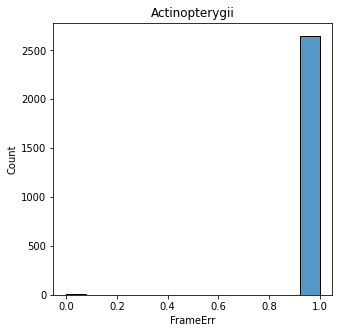

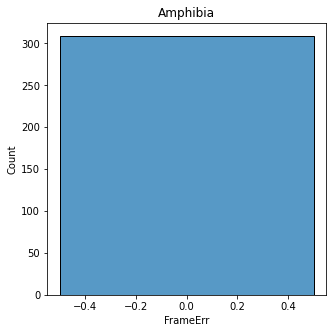

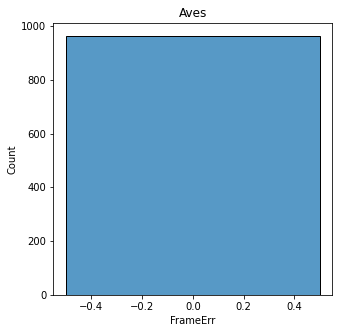

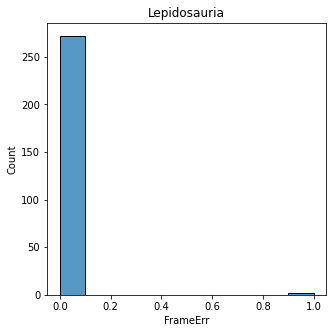

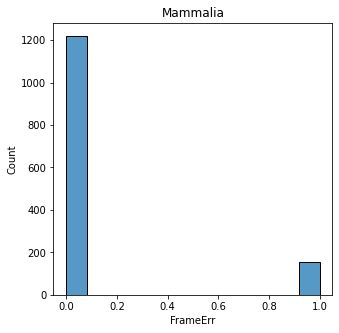

In [28]:
for tax in stat.Class.drop_duplicates():
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111) 
    sns.histplot(stat[stat.Class == tax]['FrameErr'])
    ax.set_title(f'{tax}')
    plt.show()
    